# MANE 4333
## Homework 7 Solutions
## Dr. Timmer

In [21]:
# Python cell to read data from file into dataframe df
import pandas as pd
df=pd.read_csv('column_2C.DAT',delimiter=' ')
df.columns=['pIncidence','pTilt','llAngle','sSlope','pRadius','spon','classification']
df.head()

,pIncidence,pTilt,llAngle,sSlope,pRadius,spon,classification
0,39.06,10.06,25.02,29.00,114.41,4.56,AB
1,68.83,22.22,50.09,46.61,105.99,-3.53,AB
2,69.30,24.65,44.31,44.64,101.87,11.21,AB
3,49.71,9.65,28.32,40.06,108.17,7.92,AB
4,40.25,13.92,25.12,26.33,130.33,2.23,AB


Problem 1 Solution
training set accuracy is 1.000000
testing set accuracy is 0.858974
confusion matrix for training set
[[146   0]
 [  0  85]]
confusion matrix for test set
[[56  7]
 [ 4 11]]


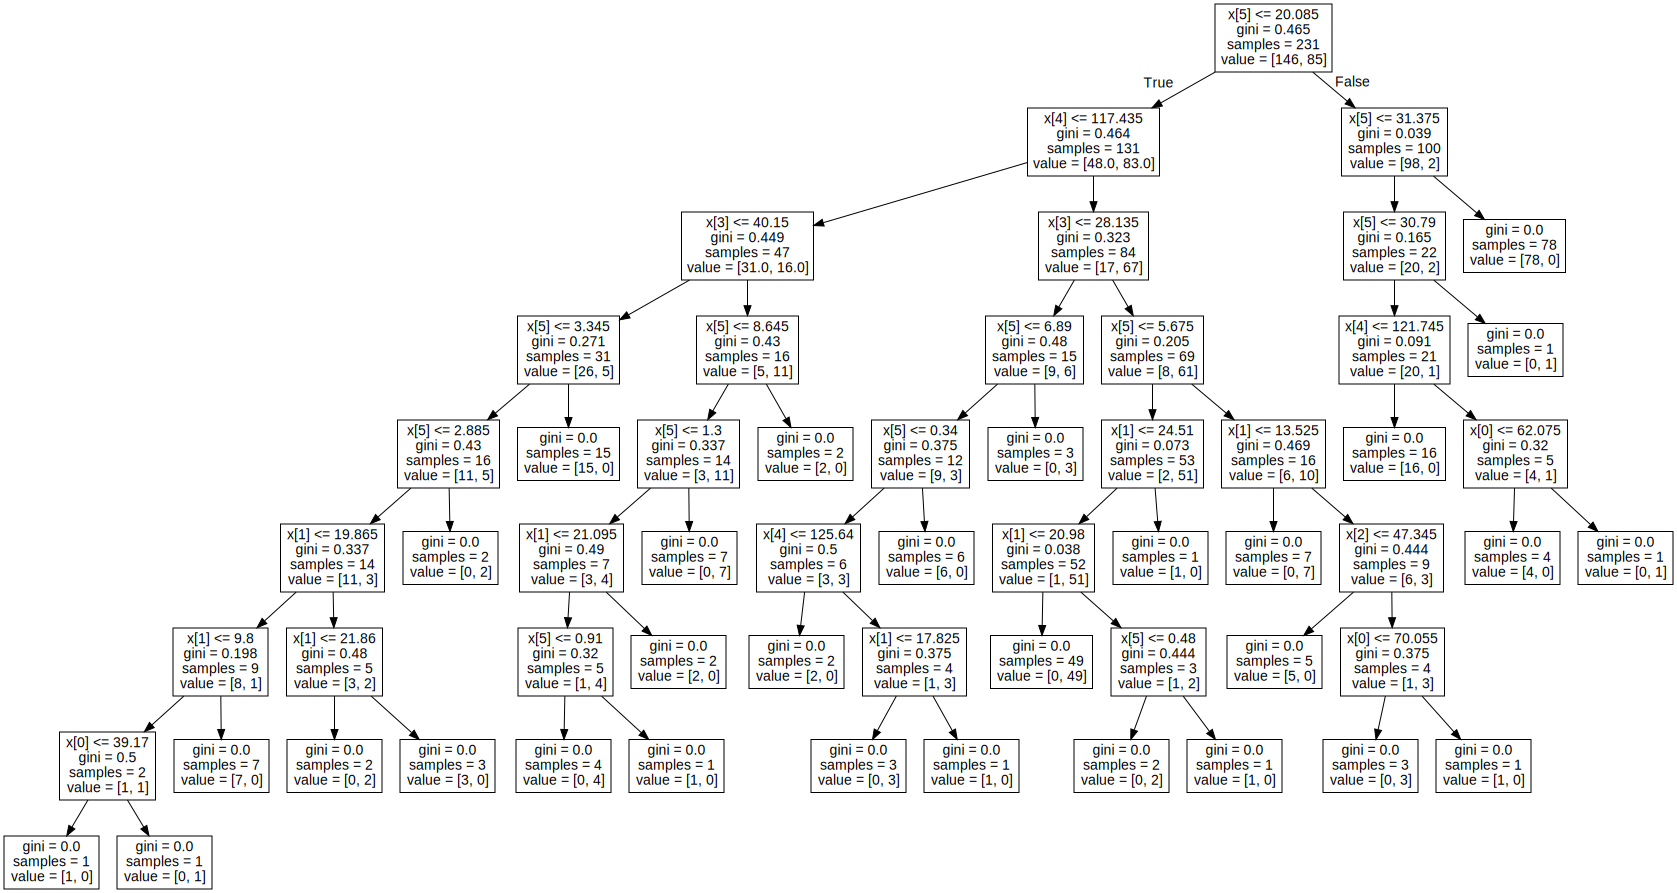

In [22]:
# Problem 1 
'''
Fit a decision tree (DecisionTreeClassifier) with default 
parameters (all blank) to the Vertebral data set. Report the 
accuracy of the decision tree for both the training and 
testing data sets. Also generate a confusion matrix and 
use graphviz to generate a graphical decision tree.
'''

print("Problem 1 Solution")

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import graphviz 
X = np.array(df.iloc[:, 0:6])
#print(X)
y = np.array(df['classification'])
#print(y)
# split and transform data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
#
clf1 = DecisionTreeClassifier()
clf1.fit(X_train,y_train)
print("training set accuracy is %f"%clf1.score(X_train,y_train))
print("testing set accuracy is %f"%clf1.score(X_test,y_test))
#
y_pred_train=clf1.predict(X_train)
cm=confusion_matrix(y_train,y_pred_train)
print("confusion matrix for training set")
print(cm)
y_pred_test=clf1.predict(X_test)
cm=confusion_matrix(y_test,y_pred_test)
print("confusion matrix for test set")
print(cm)
#
dot_data = tree.export_graphviz(clf1, out_file=None) 
graph = graphviz.Source(dot_data)  
graph

In [23]:
# Problem 2
'''
Select a parameter for the decision tree created in 
Problem 1 and change its value and refit the model. 
Explain the reason for selecting your parameter and 
the impact that you expect to observe upon the structure 
and performance of the decision tree. Once again, 
calculate accuracy scores for both the training and 
test sets, generate a confusion matrix and use graphviz 
to generate a graphical decision tree. Did the change in 
parameters meet your expectations? (please explain)
'''

print("Problem 2 Solution")  
clf2 = DecisionTreeClassifier(min_samples_leaf=5)
clf2.fit(X_train,y_train)
print("training set accuracy is %f"%clf2.score(X_train,y_train))
print("testing set accuracy is %f"%clf2.score(X_test,y_test))
#
y_pred_train=clf2.predict(X_train)
cm=confusion_matrix(y_train,y_pred_train)
print("confusion matrix for training set")
print(cm)
y_pred_test=clf2.predict(X_test)
cm=confusion_matrix(y_test,y_pred_test)
print("confusion matrix for test set")
print(cm)
#
dot_data = tree.export_graphviz(clf2, out_file=None) 
graph = graphviz.Source(dot_data)  
graph

print("I selected min_samples_leaf=5")
print("This parameter was selected to simplify the tree by requiring a minimum of 5 observations per leaf")
print("The tree is simplified and the accuracy was not adversely affected")

Problem 2 Solution
training set accuracy is 0.930736
testing set accuracy is 0.846154
confusion matrix for training set
[[141   5]
 [ 11  74]]
confusion matrix for test set
[[56  7]
 [ 5 10]]
I selected min_samples_leaf=5
This parameter was selected to simplify the tree by requiring a minimum of 5 observations per leaf
The tree is simplified and the accuracy was not adversely affected


In [24]:
# Problem 3
'''
Use the extreme gradient boost 
classifier (GradientBoostClassifier) to fit a model  
with default parameters (all blank) to the Vertebral 
data set. Report the accuracy of the decision tree for 
both the training and testing data sets as well as 
generate a confusion matrix.
'''

print("Problem 3 Solution")
from sklearn.ensemble import GradientBoostingClassifier
clf3 = GradientBoostingClassifier()
clf3.fit(X_train,y_train)
print("training set accuracy is %f"%clf3.score(X_train,y_train))
print("testing set accuracy is %f"%clf3.score(X_test,y_test))
y_pred_train=clf3.predict(X_train)
cm=confusion_matrix(y_train,y_pred_train)
print("confusion matrix for training set")
print(cm)
y_pred_test=clf3.predict(X_test)
cm=confusion_matrix(y_test,y_pred_test)
print("confusion matrix for test set")
print(cm)


Problem 3 Solution
training set accuracy is 1.000000
testing set accuracy is 0.807692
confusion matrix for training set
[[146   0]
 [  0  85]]
confusion matrix for test set
[[52 11]
 [ 4 11]]


In [25]:
# Problem 4
'''
Select a parameter for the extreme gradient boost 
classifier model created in Problem 3 and change its 
value and refit the model. Ideally, you will select 
a different parameter than the one used in Problems 2. 
Explain the reason for selecting your parameter and the 
impact that you expect to observe upon the structure and 
performance of the model. Once again, calculate accuracy 
scores for both the training and test sets, and generate 
a confusion matrix. Did the change in parameters meet 
your expectations? (please explain)
'''

print("Problem 4 Solution")

from sklearn.ensemble import GradientBoostingClassifier
clf4 = GradientBoostingClassifier(max_depth=3)
clf4.fit(X_train,y_train)
print("training set accuracy is %f"%clf4.score(X_train,y_train))
print("testing set accuracy is %f"%clf4.score(X_test,y_test))
y_pred_train=clf4.predict(X_train)
cm=confusion_matrix(y_train,y_pred_train)
print("confusion matrix for training set")
print(cm)
y_pred_test=clf4.predict(X_test)
cm=confusion_matrix(y_test,y_pred_test)
print("confusion matrix for test set")
print(cm)

print("I selected the max_depth parameter to simplify the problem")
print("It worked well and the accuracy was not adversely affedted")

Problem 4 Solution
training set accuracy is 1.000000
testing set accuracy is 0.807692
confusion matrix for training set
[[146   0]
 [  0  85]]
confusion matrix for test set
[[52 11]
 [ 4 11]]
I selected the max_depth parameter to simplify the problem
It worked well and the accuracy was not adversely affedted


In [26]:
# Problem 5
'''
Use the random forest classifier (RandomForestClassifier) 
to fit a model  with default parameters (all blank) to 
the Vertebral data set. Report the accuracy of the decision 
tree for both the training and testing data sets as well 
as generate a confusion matrix.
'''

print("Problem 5 Solution")

from sklearn.ensemble import RandomForestClassifier
clf5 = RandomForestClassifier()
clf5.fit(X_train,y_train)
print("training set accuracy is %f"%clf5.score(X_train,y_train))
print("testing set accuracy is %f"%clf5.score(X_test,y_test))
y_pred_train=clf5.predict(X_train)
cm=confusion_matrix(y_train,y_pred_train)
print("confusion matrix for training set")
print(cm)
y_pred_test=clf5.predict(X_test)
cm=confusion_matrix(y_test,y_pred_test)
print("confusion matrix for test set")
print(cm)

Problem 5 Solution
training set accuracy is 1.000000
testing set accuracy is 0.858974
confusion matrix for training set
[[146   0]
 [  0  85]]
confusion matrix for test set
[[56  7]
 [ 4 11]]


In [27]:
# Problem 6
'''
Select a parameter for the random forest classifier 
model created in Problem 5 and change its value and refit 
the model. Ideally, you will select a different parameter 
than the ones used in Problems 2 and 4. Explain the reason for 
selecting your parameter and the impact that you expect to 
observe upon the structure and performance of the model. 
Once again, calculate accuracy scores for both the training 
and test sets, and generate a confusion matrix. Did the change 
in parameters meet your expectations? (please explain)
'''

print("Problem 6 Solution")

from sklearn.ensemble import RandomForestClassifier
clf6 = RandomForestClassifier(max_features='log2')
clf6.fit(X_train,y_train)
print("training set accuracy is %f"%clf6.score(X_train,y_train))
print("testing set accuracy is %f"%clf6.score(X_test,y_test))
y_pred_train=clf6.predict(X_train)
cm=confusion_matrix(y_train,y_pred_train)
print("confusion matrix for training set")
print(cm)
y_pred_test=clf6.predict(X_test)
cm=confusion_matrix(y_test,y_pred_test)
print("confusion matrix for test set")
print(cm)
print("I selected the max_features parameter and set it equal to log2")
print("It improved the performance of the Random Forest Classifier")

Problem 6 Solution
training set accuracy is 1.000000
testing set accuracy is 0.897436
confusion matrix for training set
[[146   0]
 [  0  85]]
confusion matrix for test set
[[58  5]
 [ 3 12]]
I selected the max_features parameter and set it equal to log2
It improved the performance of the Random Forest Classifier
